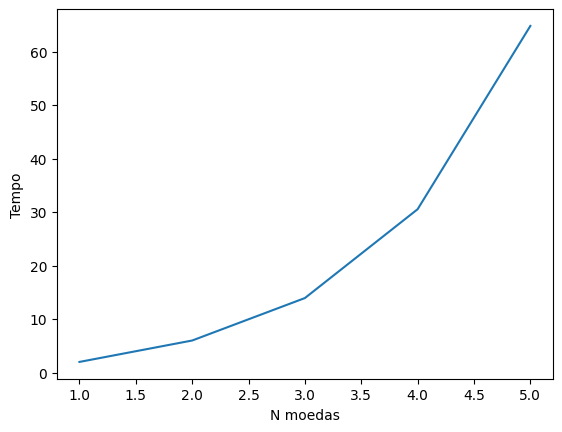

In [20]:
# 1)

import numpy as np
import matplotlib.pyplot as plt

def simulate(N: int) -> int:
    consecutive_heads = 0
    steps = 0

    while True:
        steps += 1
        toss = np.random.randint(0, 2)
        consecutive_heads = consecutive_heads + 1 if toss == 1 else 0

        if consecutive_heads == N:
            break

    return steps

def monte_carlo():
    times = 1_000
    N = 6
    x = []
    y = []

    for i in range(1, N):
        acc = 0
        x.append(i)

        for j in range(times):
            acc += simulate(i)
        
        y.append(acc / times)

    plt.xlabel('N moedas')
    plt.ylabel('Tempo')
    plt.plot(x, y)

monte_carlo()


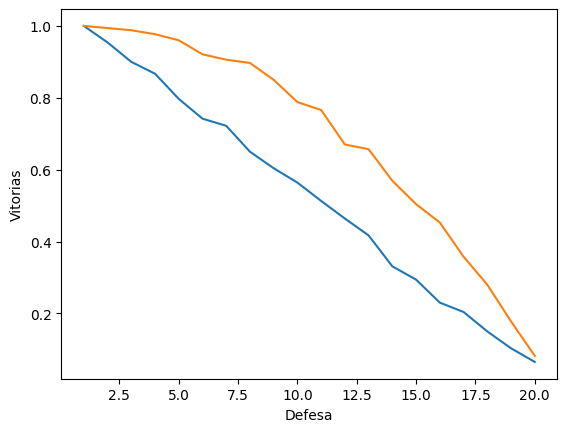

In [24]:
# 2)

import numpy as np
import matplotlib.pyplot as plt

def attack(defense: int, advantage: bool) -> bool:
    atk1 = np.random.randint(1, 21)
    if not advantage:
        return True if atk1 >= defense else False

    atk2 = np.random.randint(1, 21)
    real_atk = max(atk1, atk2)

    return True if real_atk >= defense else False


def monte_carlo(has_advantage: True):
    times = 1000
    x = []
    y = []

    for D in range(1, 21):
        acc = 0
        x.append(D)
        for i in range(times):
            if attack(D, has_advantage):
                acc += 1
        y.append(acc / times)

    plt.xlabel('Defesa')
    plt.ylabel('Vitorias')
    plt.plot(x, y)

monte_carlo(False)
monte_carlo(True)


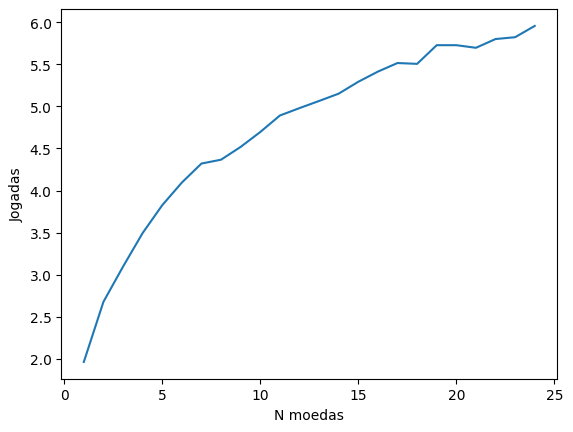

In [3]:
# 3)

import numpy as np
import matplotlib.pyplot as plt

def toss_n_coins(start: int):
    faces = ['H', 'T']
    n = start
    steps = 0

    while True:
        steps += 1
        coins = [np.random.choice(faces) for _ in range(n)]
        n = coins.count('T')

        if n == 0:
            break

    return steps

def monte_carlo():
    times = 1000
    x = []
    y = []

    for n in range(1, 25):
        acc = 0
        for i in range(times):
            acc += toss_n_coins(n)
        x.append(n)
        y.append(acc / times)
    
    plt.xlabel('N moedas')
    plt.ylabel('Jogadas')
    plt.plot(x, y)
        
monte_carlo()

In [43]:
# 4)

import numpy as np
import matplotlib.pyplot as plt

def both_male() -> bool:
    first = np.random.choice(['M', 'F'])
    if first == 'F':
        return False

    second = np.random.choice(['M', 'F'])
    if second == 'M':
        return True
    
    return False

def monte_carlo() -> float:
    times = 1_000
    acc = 0

    for i in range(1, times + 1):
        if both_male():
            acc += 1

    return acc / times

print(monte_carlo())

0.267


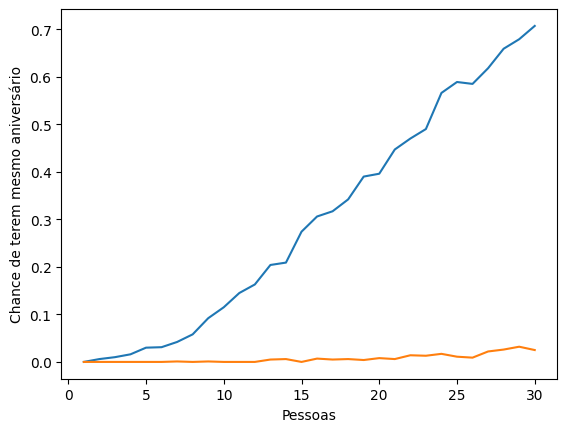

In [83]:
# 5)

import numpy as np
import matplotlib.pyplot as plt

def birthday_paradox(n: int, same_birthday: int) -> bool:
    coincidences = [0 for _ in range(366)]
    birthdays = [np.random.randint(1, 366) for _ in range(n)]

    for birthday in birthdays:
        occurrences = coincidences[birthday]
        coincidences[birthday] = occurrences + 1

        if coincidences[birthday] == same_birthday:
            return True

    return False

def monte_carlo(same_birthday: int):
    times = 1_000
    x = []
    y = []

    for n in range(1, 31):
        acc = 0
        for i in range(1, times + 1):
            if birthday_paradox(n, same_birthday):
                acc += 1
        x.append(n)
        y.append(acc / times)

    plt.xlabel('Pessoas')
    plt.ylabel('Chance de terem mesmo aniversário')
    plt.plot(x, y)

monte_carlo(2)
monte_carlo(3)

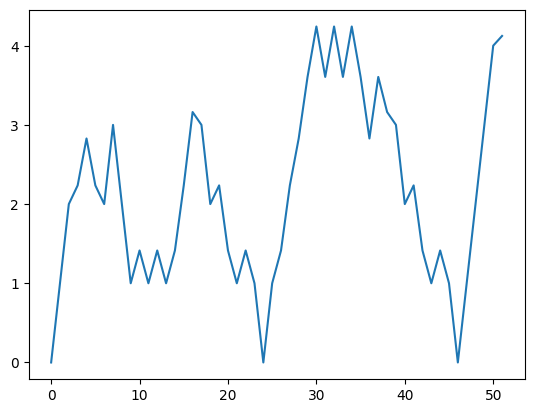

In [129]:
# 6)
# a)

import math
import numpy as np
import matplotlib.pyplot as plt

def walk(direction: str, point: tuple[int, int]) -> tuple[int, int]:
    if direction == 'N':
        return (point[0], point[1] + 1)
    
    if direction == 'S':
        return (point[0], point[1] - 1)
    
    if direction == 'E':
        return (point[0] + 1, point[1])
    
    return (point[0] - 1, point[1])

def distance(p1: tuple[int, int], p2: tuple[int, int]) -> float:
    return math.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))

def random_walk_to_goal():
    steps = 0
    start = (0, 0)
    current = (0, 0)
    directions = ['N', 'S', 'E', 'W']

    x = []
    y = []

    while (dist := distance(start, current)) <= 5:
        x.append(steps)
        y.append(dist)
        steps += 1

        direction = np.random.choice(directions)
        current = walk(direction, current)

    plt.plot(x, y)

random_walk_to_goal()

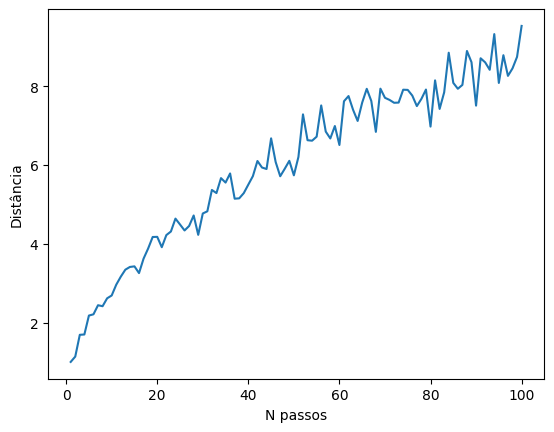

In [3]:
# 6)
# b)

import math
import numpy as np
import matplotlib.pyplot as plt

def walk(direction: str, point: tuple[int, int]) -> tuple[int, int]:
    if direction == 'N':
        return (point[0], point[1] + 1)
    
    if direction == 'S':
        return (point[0], point[1] - 1)
    
    if direction == 'E':
        return (point[0] + 1, point[1])
    
    return (point[0] - 1, point[1])

def distance(p1: tuple[int, int], p2: tuple[int, int]) -> float:
    return math.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))

def random_walk(limit: int) -> float:
    steps = 0
    start = (0, 0)
    current = (0, 0)
    directions = ['N', 'S', 'E', 'W']

    while steps < limit:
        steps += 1
        direction = np.random.choice(directions)
        current = walk(direction, current)

    return distance(current, start)

def monte_carlo(limit: int) -> float:
    times = 100
    acc = 0

    for i in range(times):
        acc += random_walk(limit)

    return acc / times

x = list(range(1, 101))
y = [monte_carlo(i) for i in range(1, 101)]

plt.xlabel('N passos')
plt.ylabel('Distância')
plt.plot(x, y)